In [1]:
# import nedded libraries
import pandas as pd
import numpy as np

#Data visualisation libraries 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-poster')

from IPython.display import display

# Machine Learning Algorithms 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report

In [2]:
# importing the dataset and investigate the features 
Well = pd.read_csv("D:\Python and machine learning amr course\Well data\Training_Well.csv")
display(Well.head())
display(Well.info())
display(Well.describe())
display(Well.columns)
#i donot have in my example nan values.

,APLC,BADHOLE,GR,HCAL,HDRA,PEFZ,RHOZ,RLA3,RLA5,RXOZ
0,0.1649,0,48.2479,8.4862,-0.0124,4.1193,2.4636,2.6433,2.7784,2.1153
1,0.1611,0,43.4798,8.4825,-0.0111,4.2495,2.4859,2.5704,2.7182,2.6741
2,0.1716,0,42.0460,8.4825,-0.0090,4.3696,2.4952,2.4916,2.6730,2.7834
3,0.1749,0,45.1136,8.4713,-0.0087,4.3801,2.4987,2.3705,2.5994,2.6487
4,0.1690,0,49.2399,8.4825,-0.0087,4.3130,2.4976,2.2552,2.6001,2.6186


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5984 entries, 0 to 5983
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   APLC     5984 non-null   float64
 1   BADHOLE  5984 non-null   int64  
 2   GR       5984 non-null   float64
 3   HCAL     5984 non-null   float64
 4   HDRA     5984 non-null   float64
 5   PEFZ     5984 non-null   float64
 6   RHOZ     5984 non-null   float64
 7   RLA3     5984 non-null   float64
 8   RLA5     5984 non-null   float64
 9   RXOZ     5984 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 467.6 KB


None

,APLC,BADHOLE,GR,HCAL,HDRA,PEFZ,RHOZ,RLA3,RLA5,RXOZ
count,5984.000000,5984.000000,5984.000000,5984.000000,5984.000000,5984.000000,5984.000000,5984.000000,5984.000000,5984.000000
mean,0.236356,0.322527,61.868502,8.775706,0.035285,3.837622,2.474306,3.714327,4.090370,2.881648
std,0.127167,0.467482,22.864535,0.777526,0.066488,0.867562,0.143429,5.714471,6.779759,5.457130
min,0.026200,0.000000,19.755900,6.774900,-0.035700,1.858100,1.699600,0.525300,0.568600,0.064600
25%,0.142800,0.000000,40.310100,8.415500,-0.007000,3.156700,2.387175,1.309500,1.422525,0.577625
50%,0.213600,0.000000,63.206700,8.501100,-0.001100,3.643800,2.494700,2.438050,2.676650,1.614000
75%,0.294850,1.000000,80.149300,8.683400,0.064525,4.669000,2.585500,4.045000,4.382325,3.405525
max,0.737300,1.000000,155.812100,13.835900,0.441300,7.634000,2.873100,103.724000,155.981200,157.232200


Index(['APLC', 'BADHOLE', 'GR', 'HCAL', 'HDRA', 'PEFZ', 'RHOZ', 'RLA3', 'RLA5',
       'RXOZ'],
      dtype='object')

Data Wrangling process

how to increase font for headers like this and above

Data exploration

In [3]:
print('data length',len(Well), "observation")
print('number of features', Well.columns.shape[0])
#data length mean data rows
#features are variables i am using

data length 5984 observation
number of features 10


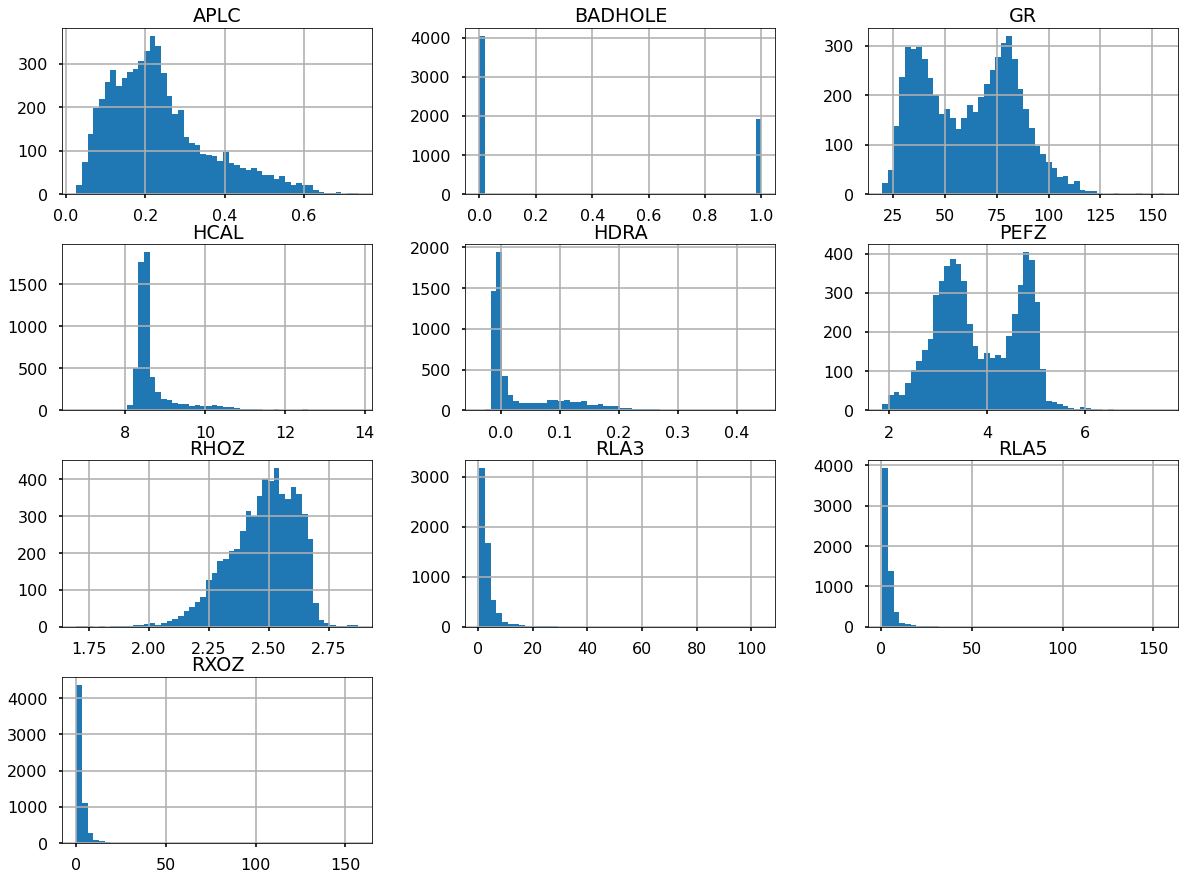

In [4]:
#histogram
Well.hist(bins=50, figsize=(20,15))
plt.show()

In [5]:
display(Well.isna().sum())

APLC       0
BADHOLE    0
GR         0
HCAL       0
HDRA       0
PEFZ       0
RHOZ       0
RLA3       0
RLA5       0
RXOZ       0
dtype: int64

Check for Co-lineality and high correlation

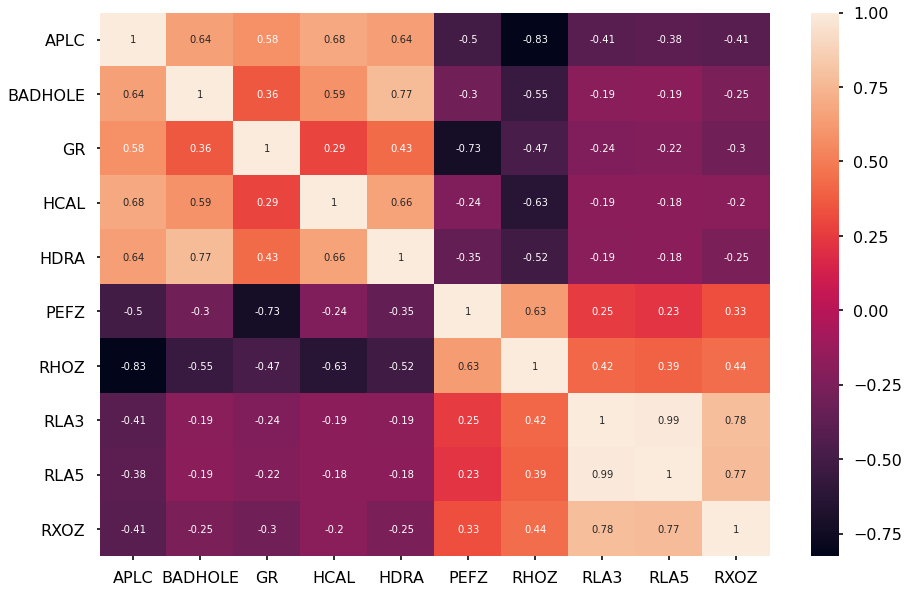

In [5]:
plt.figure(figsize = (15,10))
sns.heatmap(Well.corr(),annot=True);

In [6]:
#dropping correlated variables
Well_Final=Well
Well_Final.drop(['RLA3','APLC',"PEFZ","RLA5","RXOZ","RLA3"], axis= 1, inplace=True)
print(Well_Final)

      BADHOLE       GR    HCAL    HDRA    RHOZ
0           0  48.2479  8.4862 -0.0124  2.4636
1           0  43.4798  8.4825 -0.0111  2.4859
2           0  42.0460  8.4825 -0.0090  2.4952
3           0  45.1136  8.4713 -0.0087  2.4987
4           0  49.2399  8.4825 -0.0087  2.4976
...       ...      ...     ...     ...     ...
5979        0  27.7209  8.1700 -0.0040  2.2674
5980        0  30.0091  8.1737 -0.0026  2.2625
5981        0  34.7164  8.1514 -0.0021  2.2563
5982        0  38.6000  8.1365 -0.0014  2.2530
5983        0  42.7189  8.1514 -0.0007  2.2483

[5984 rows x 5 columns]


In [7]:
X_2 = Well_Final.drop(columns=['BADHOLE'])
y = Well_Final['BADHOLE']
print(X_2.shape)
print(y.shape)

(5984, 4)
(5984,)


Scaling the data set before logistic regression

In [9]:
# Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X_2)
print(X)

[[-0.59575846 -0.37237376 -0.71725967 -0.07464939]
 [-0.80431281 -0.37713284 -0.69770552  0.08084113]
 [-0.86702652 -0.37713284 -0.66611804  0.14568695]
 ...
 [-1.18761963 -0.80300633 -0.56233063 -1.52008367]
 [-1.01775287 -0.82217128 -0.55180147 -1.54309348]
 [-0.83759421 -0.80300633 -0.54127231 -1.57586502]]


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
#importing confusion matrix data
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import zero_one_loss
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)
print(X_test)
print("the size of the X_train now is : ",X_train.shape)
print("the size of the X_test now is : ",X_test.shape)

[[-0.85110971 -0.44890493 -0.53224732  1.44748425]
 [-1.13099884 -0.52543611 -0.60143893  0.04597778]
 [ 0.32924906 -0.38189192 -0.61046392  0.44760352]
 ...
 [-1.04896101 -0.24799452 -0.64355556  0.99914163]
 [ 2.22284615 -0.41070366 -0.45703905  0.55289082]
 [-0.13343622 -0.50639978 -0.70973884 -0.19946016]]
the size of the X_train now is :  (4009, 4)
the size of the X_test now is :  (1975, 4)


Logistic regression model

In [12]:
# get a logistic regression of scaled data as below:
LR = LogisticRegression(max_iter= 200, multi_class='auto')
LR.fit(X_train, y_train)
LR_y_score = LR.predict_proba(X_train)
LR_y_predict = LR.predict(X_test)
LR_y_Total=LR.predict(X)

In [13]:
#Calculating Details
print('LogisticRegressionModel Train Score is : ' , LR.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LR.score(X_test, y_test))
print('LogisticRegressionModel Classes are : ' , LR.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LR.n_iter_)


LogisticRegressionModel Train Score is :  0.9199301571464206
LogisticRegressionModel Test Score is :  0.9265822784810127
LogisticRegressionModel Classes are :  [0 1]
LogisticRegressionModel No. of iteratios is :  [16]


Confusion Matrix

Log Reg Accuracy 92.66 %:


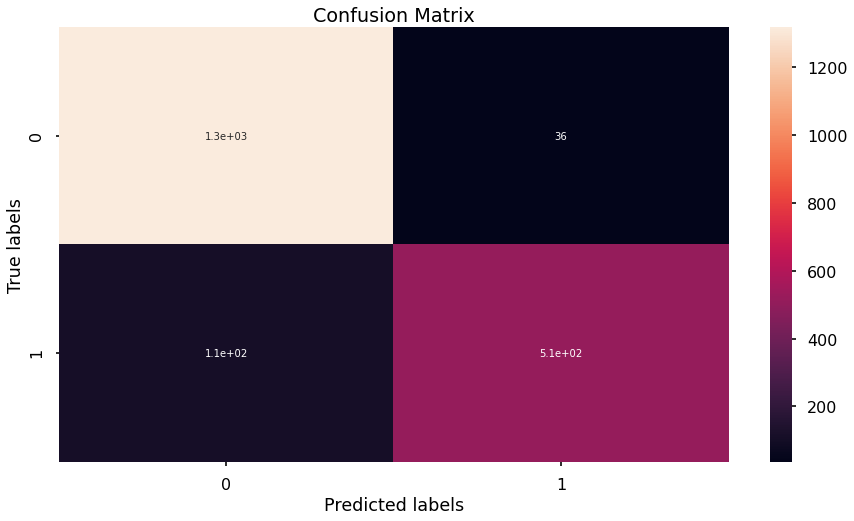

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

LR_cm = confusion_matrix(y_true=y_test, y_pred=LR_y_predict)
print("Log Reg Accuracy {:.2f} %:". format(metrics.accuracy_score(y_test, LR_y_predict)*100))

# plot Confusion Matrix
plt.figure(figsize = (15,8))
ax= plt.subplot()
sns.heatmap(LR_cm, annot=True, ax = ax, cbar=True)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show();

In [15]:
print(classification_report(y_test, LR_y_predict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1354
           1       0.93      0.82      0.88       621

    accuracy                           0.93      1975
   macro avg       0.93      0.90      0.91      1975
weighted avg       0.93      0.93      0.93      1975



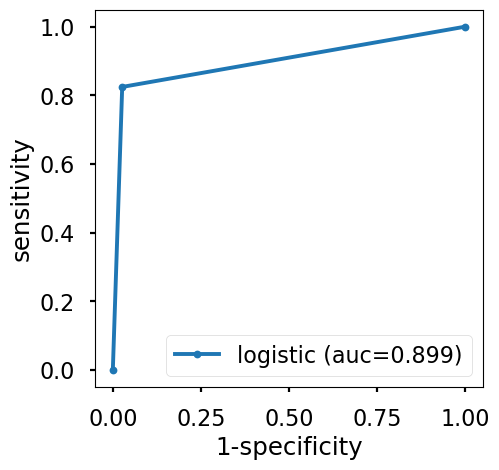

In [16]:
from sklearn.metrics import roc_auc_score
logistic_fpr, logistic_tpr, threshold= roc_curve(y_test,LR_y_predict)
auc_logistic= auc(logistic_fpr, logistic_tpr)
plt.figure(figsize=(5,5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='logistic (auc=%0.3f)'% auc_logistic)
plt.xlabel('1-specificity')
plt.ylabel('sensitivity')
plt.legend()
plt.show()

Predicted Value for LogisticRegressionModel is :  [0 0 0 ... 0 0 0]
Prediction Probabilities Value for LogisticRegressionModel is :  [[9.66961108e-01 3.30388923e-02]
 [9.30421238e-01 6.95787620e-02]
 [9.55302197e-01 4.46978028e-02]
 [2.65842600e-04 9.99734157e-01]
 [9.23655228e-01 7.63447725e-02]
 [9.20658481e-01 7.93415189e-02]
 [9.24617773e-01 7.53822268e-02]
 [9.72667397e-01 2.73326025e-02]
 [1.79146499e-06 9.99998209e-01]
 [9.64954437e-01 3.50455633e-02]]
Confusion Matrix is : 
 [[1318   36]
 [ 109  512]]


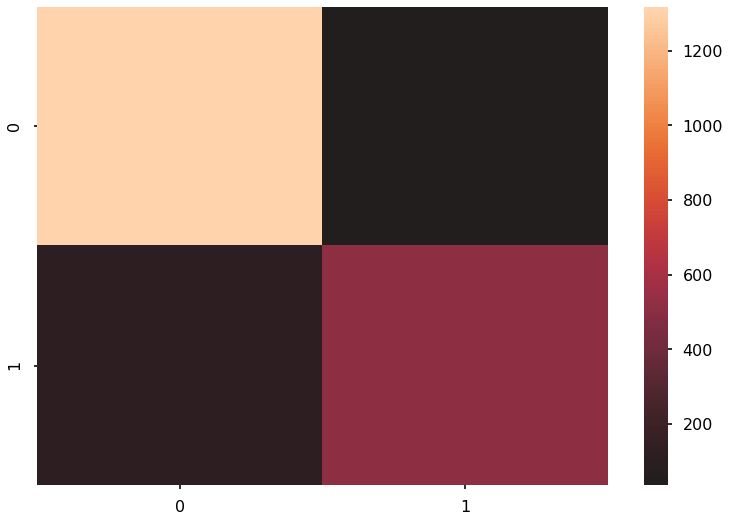

In [17]:
#Calculating Prediction
y_pred = LR.predict(X_test)
y_pred_prob = LR.predict_proba(X_test)
print('Predicted Value for LogisticRegressionModel is : ' , y_pred)
print('Prediction Probabilities Value for LogisticRegressionModel is : ' , y_pred_prob[:10])

#----------------------------------------------------
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)
# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()
#Result of confusion matrix 1318 true postive, while false negative 
#are 109 and false postive are 36 while true negative are 512

In [18]:
prediction_y_total= pd.DataFrame(LR_y_Total, columns=['Pred_badhole']).to_csv('Badhole_predicted.csv')

In [19]:
Apply_well = pd.read_csv("D:\Python and machine learning amr course\Apply well\Apply_Well.csv")
display(Apply_well.head())
display(Apply_well.info())
display(Apply_well.describe())
display(Apply_well.columns)
#i donot have in my example nan values.

,DEPTH,GR,HCAL,HDRA,RHOZ
0,4134.0,19.560699,8.6429,0.0044,2.6524
1,4134.5,18.680799,8.6348,0.0063,2.6598
2,4135.0,19.119699,8.6551,0.0047,2.6595
3,4135.5,17.374001,8.6551,0.0066,2.6684
4,4136.0,18.682600,8.6429,0.0067,2.6681


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5286 entries, 0 to 5285
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   5286 non-null   float64
 1   GR      5286 non-null   float64
 2   HCAL    5286 non-null   float64
 3   HDRA    5286 non-null   float64
 4   RHOZ    5286 non-null   float64
dtypes: float64(5)
memory usage: 206.6 KB


None

,DEPTH,GR,HCAL,HDRA,RHOZ
count,5286.000000,5286.000000,5286.000000,5286.000000,5286.000000
mean,5455.250000,65.240653,9.663589,-1.102880,1.189467
std,763.040546,22.959877,1.748554,84.658987,84.694664
min,4134.000000,16.090200,2.553400,-6155.057129,-6155.342285
25%,4794.625000,47.466549,8.586200,0.002400,2.205225
50%,5455.250000,69.734348,8.691500,0.035100,2.374600
75%,6115.875000,80.340826,10.850575,0.108200,2.527375
max,6776.500000,139.867294,22.988199,1.617200,2.843400


Index(['DEPTH', 'GR', 'HCAL', 'HDRA', 'RHOZ'], dtype='object')

In [20]:
X_2_apply = Apply_well.drop(columns=['DEPTH'])
print(X_2_apply)
print(X_2_apply.shape)

             GR    HCAL         HDRA         RHOZ
0     19.560699  8.6429     0.004400     2.652400
1     18.680799  8.6348     0.006300     2.659800
2     19.119699  8.6551     0.004700     2.659500
3     17.374001  8.6551     0.006600     2.668400
4     18.682600  8.6429     0.006700     2.668100
...         ...     ...          ...          ...
5281  39.244099  2.5695     0.157400     2.159600
5282  39.244099  2.5695     0.157500     2.159800
5283  39.244099  2.5695     0.887300     2.159500
5284  39.244099  2.5695     1.617200     2.159300
5285  39.244099  2.5695 -6155.057129 -6155.342285

[5286 rows x 4 columns]
(5286, 4)


In [15]:
import pickle

In [16]:
with open ('LR_pickle','wb') as f:
    pickle.dump(LR,f)

Support vector machine 

In [21]:
from sklearn import svm
svc = svm.SVC(kernel='rbf').fit(X_train, y_train) #check why you done this in code 
print("{:*^20s}".format("SVM Done"))

******SVM Done******


SVM Accuracy 93.42 %:


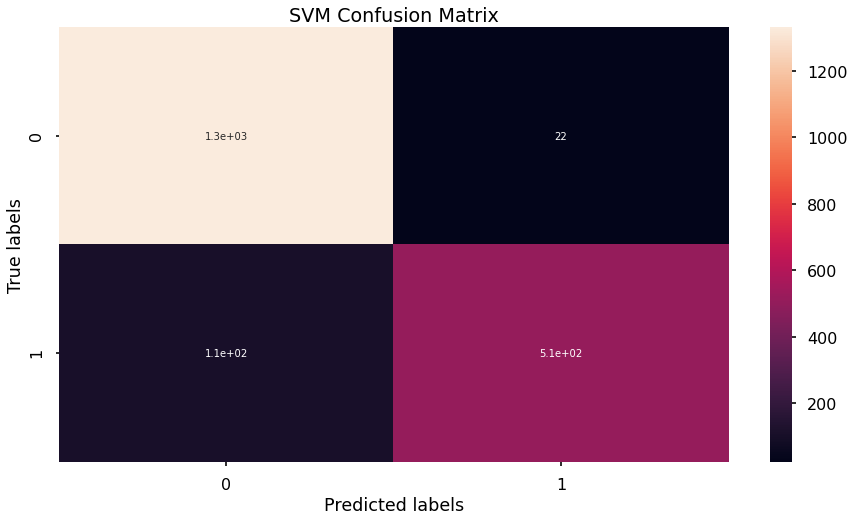

In [22]:
y_pred_svm = svc.predict(X_test)
print("SVM Accuracy {:.2f} %:". format(metrics.accuracy_score(y_test, y_pred_svm)*100)) #what does that mean to mutiply *100

svm_cm = confusion_matrix(y_test, y_pred_svm)
# plot Confusion Matrix
plt.figure(figsize = (15,8))
ax = plt.subplot()
sns.heatmap(svm_cm, ax = ax, annot=True)
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('SVM Confusion Matrix')
plt.show()

In [23]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1354
           1       0.96      0.83      0.89       621

    accuracy                           0.93      1975
   macro avg       0.94      0.90      0.92      1975
weighted avg       0.94      0.93      0.93      1975



In [24]:
y_svm_total=svc.predict(X)
print(y_svm_total)

[0 0 0 ... 0 0 0]


In [20]:
prediction_Badhole_SVC= pd.DataFrame(y_svm_total, columns=['Badhole']).to_csv('Badhole_SVC.csv')

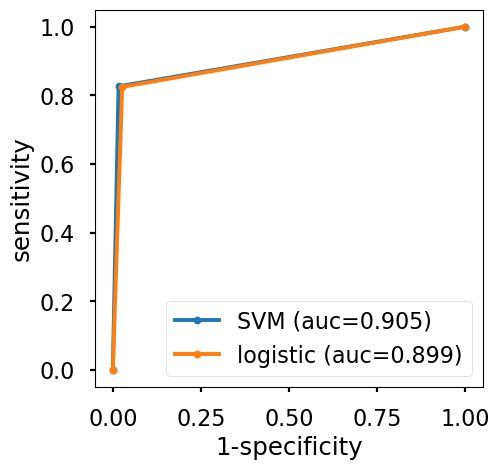

In [25]:
from sklearn.metrics import roc_auc_score
logistic_fpr, logistic_tpr, threshold= roc_curve(y_test,LR_y_predict)
auc_logistic= auc(logistic_fpr, logistic_tpr)
svm_fpr, svm_tpr, threshold= roc_curve(y_test, y_pred_svm)
auc_svm= auc(svm_fpr, svm_tpr)
plt.figure(figsize=(5,5), dpi=100)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (auc=%0.3f)'% auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='logistic (auc=%0.3f)'% auc_logistic)
plt.xlabel('1-specificity')
plt.ylabel('sensitivity')
plt.legend()
plt.show()

In [26]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix

DT_train_preds = DT.predict(X_train)
DT_Training_Score  = accuracy_score(y_train, DT_train_preds)
print("The training accuracy_score is : {} % ".format(DT_Training_Score*100))
DT_Scoring = DT.score(X_test, y_test)
print("The test accuracy_score is : {} % ".format(DT_Scoring*100))

The training accuracy_score is : 100.0 % 
The test accuracy_score is : 89.87341772151899 % 


In [28]:
DT.feature_importances_

array([0.07979382, 0.05915389, 0.74458702, 0.11646527])

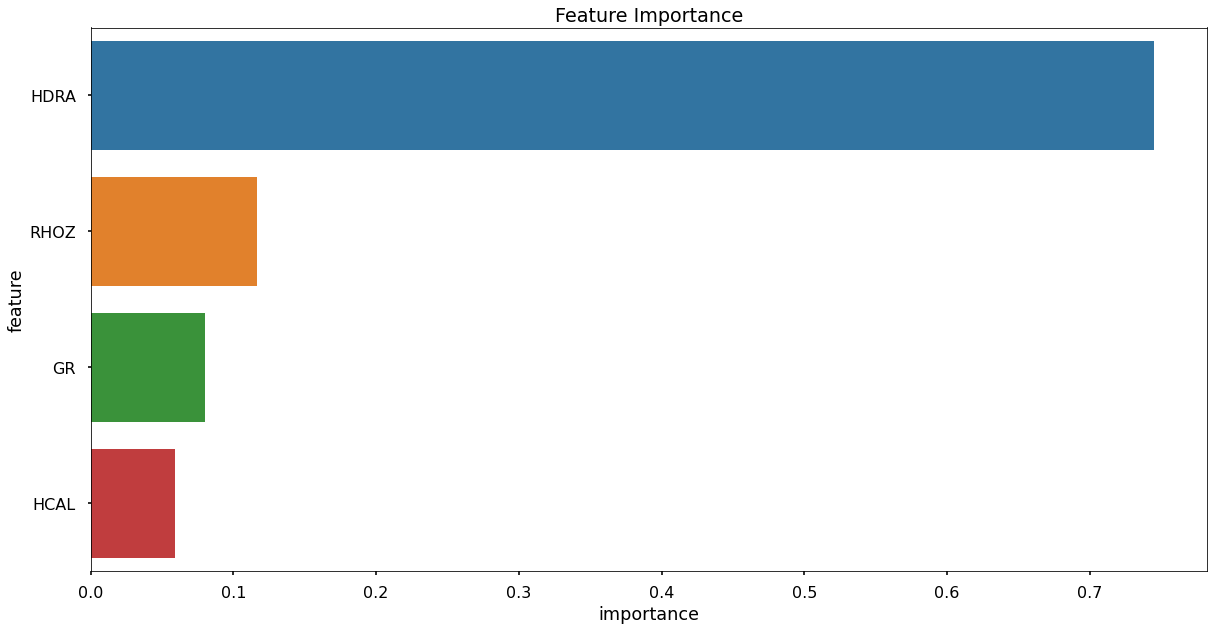

In [29]:
importance_df = pd.DataFrame({
  'feature': X_2.columns,
  'importance': DT.feature_importances_
}).sort_values('importance', ascending=False)
#CHECK??
importance_df
plt.figure(figsize=(20,10))
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

Tree maximum depth

In [30]:
Max_Depth = DT.tree_.max_depth
print("Tree Maximum Depth : {} layers ".format(Max_Depth))

Tree Maximum Depth : 25 layers 


Visualize the tree layer as Decision Tree and Gini Index

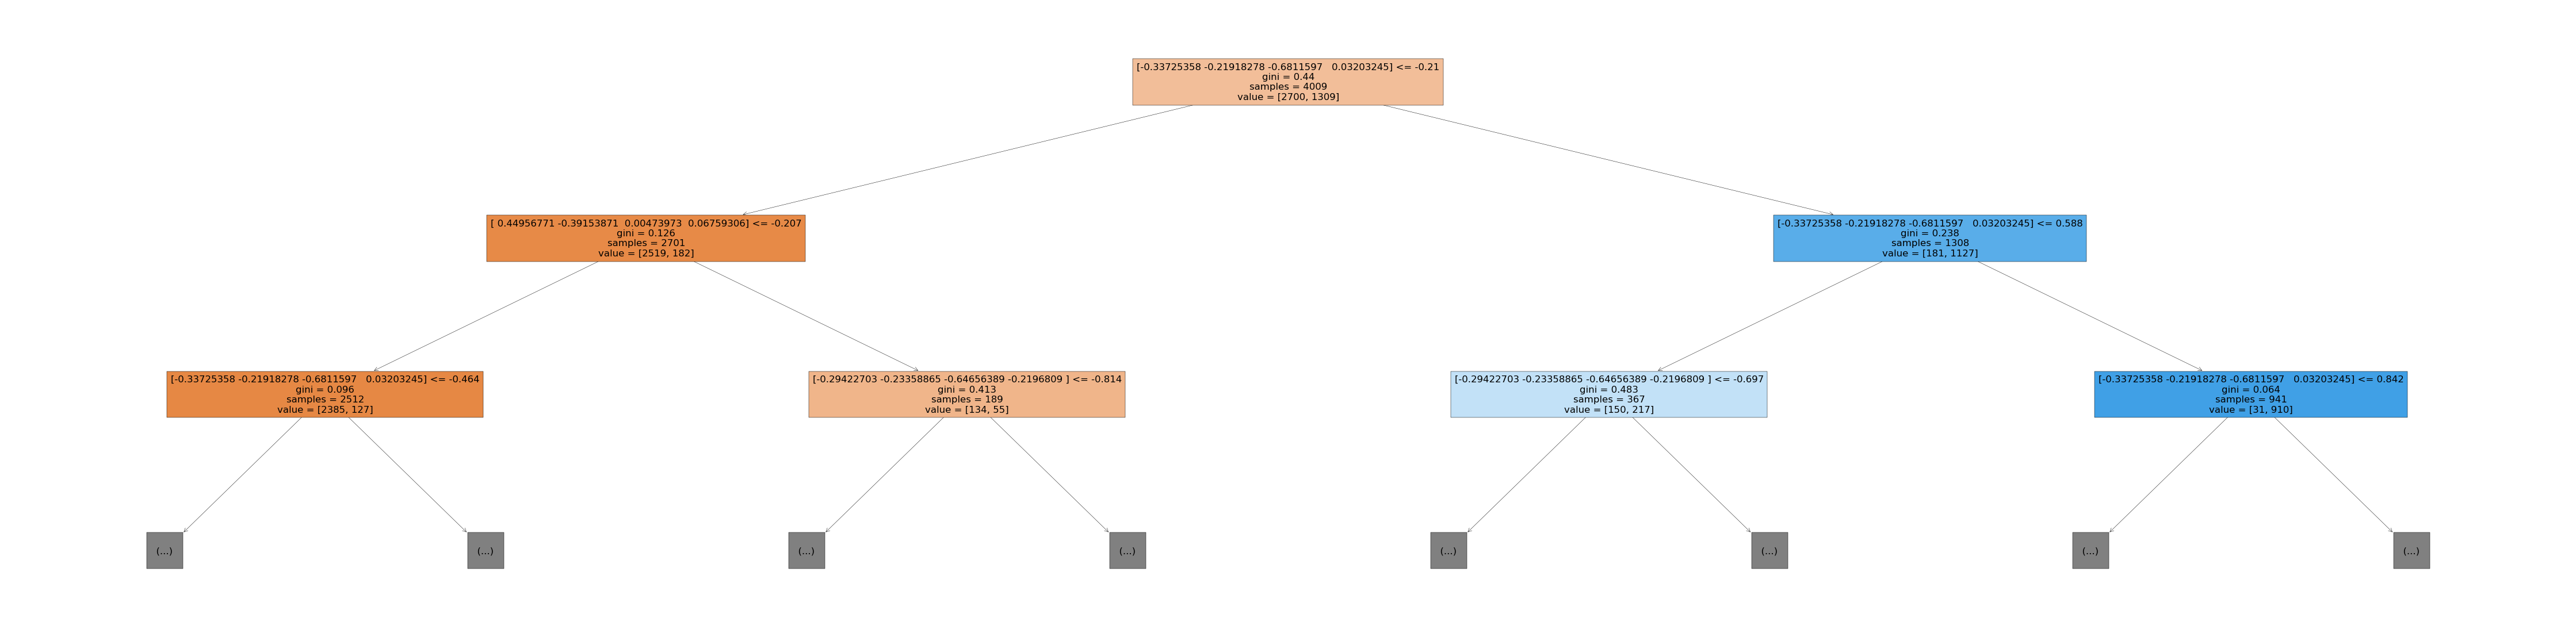

In [31]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(80,20))
plot_tree(DT, feature_names=X_train, max_depth=2, filled=True);

HyperParameter Tunning

In [32]:
def max_depth_error(md):
  tuned_model = DecisionTreeClassifier(max_depth=md, random_state=42)
  tuned_model.fit(X_train, y_train)
  train_acc = 1 - tuned_model.score(X_train, y_train)
  val_acc = 1 -  tuned_model.score(X_test, y_test)
  return {'Max Depth': md, 'Training Error': train_acc, 'Test Error': val_acc}

In [34]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

Wall time: 358 ms


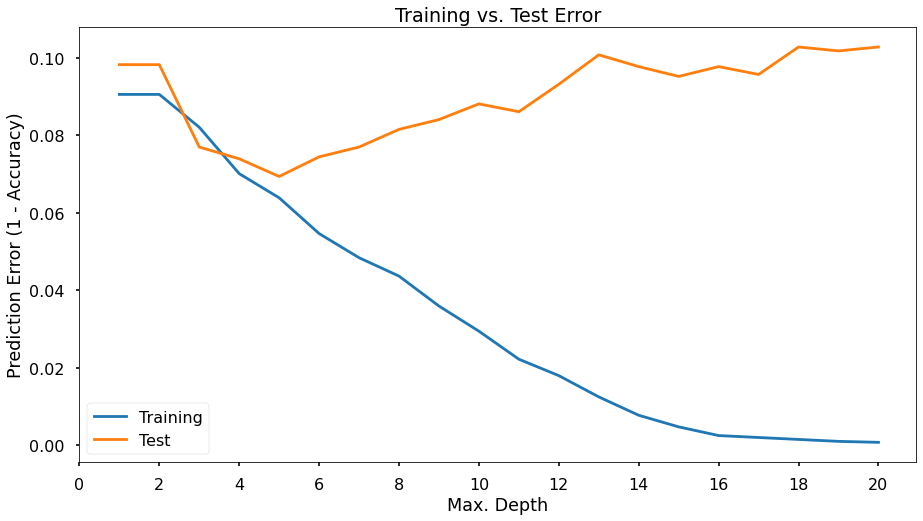

In [35]:
plt.figure(figsize = (15,8))
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Test Error'])
plt.title('Training vs. Test Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Test'])

max_leaf_nodes

to control the size of complexity of a decision tree 
is to limit the number of leaf nodes. This allows branches of the tree to have varying depths.

In [36]:
def max_leaf_nodes_error(mln):
  leaf_model = DecisionTreeClassifier(max_leaf_nodes=mln, random_state=42)
  leaf_model.fit(X_train, y_train)
  leaf_train_acc = 1 - leaf_model.score(X_train, y_train)
  leaf_test_acc = 1 - leaf_model.score(X_test, y_test)
  return {'max_leaf_nodes': mln, 'Training Error': leaf_train_acc, 'Test Error': leaf_test_acc}

In [37]:
%%time
mln_errors_df = pd.DataFrame([max_leaf_nodes_error(mln) for mln in range(10, 200)])

Wall time: 2.48 s


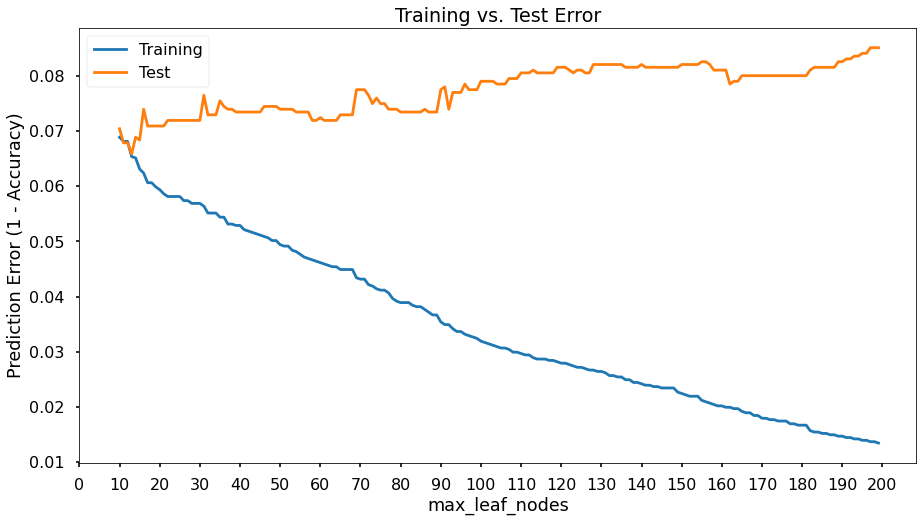

In [38]:
plt.figure(figsize = (15,8))
plt.plot(mln_errors_df['max_leaf_nodes'], mln_errors_df['Training Error'])
plt.plot(mln_errors_df['max_leaf_nodes'], mln_errors_df['Test Error'])
plt.title('Training vs. Test Error')
plt.xticks(range(0,201, 10))
plt.xlabel('max_leaf_nodes')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Test']);

In [39]:

DT_modifed = DecisionTreeClassifier(max_leaf_nodes=10,max_depth=4,
                              min_samples_leaf=5, random_state=42).fit(X_train, y_train)

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix

DT_modifed_train_preds = DT_modifed.predict(X_train)
DT_modifed_Training_Score  = accuracy_score(y_train, DT_modifed_train_preds)
print("The training accuracy_score is : {} % ".format(DT_modifed_Training_Score*100))
DT_modifed_Scoring = DT_modifed.score(X_test, y_test)
print("The test accuracy_score is : {} % ".format(DT_modifed_Scoring*100))
DT_Final=DT_modifed.predict(X_test)
print(DT_Final)

The training accuracy_score is : 92.96582688949863 % 
The test accuracy_score is : 92.91139240506328 % 
[0 0 0 ... 0 0 0]


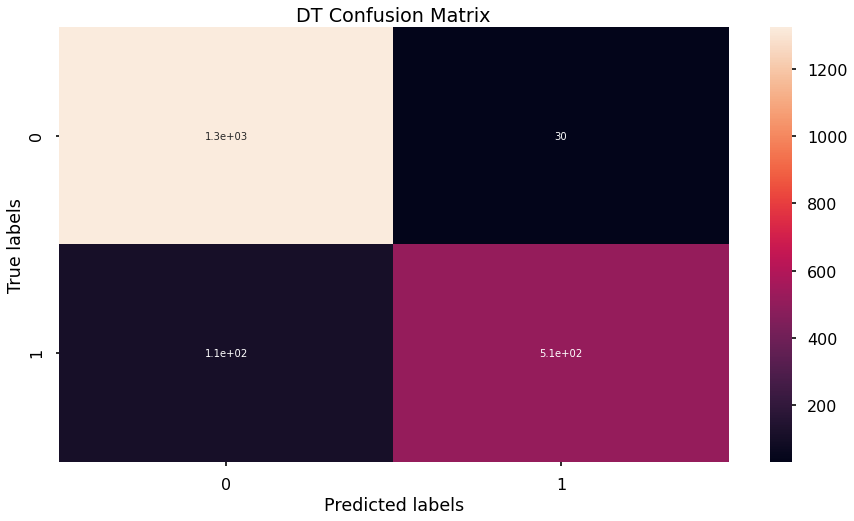

In [45]:
DT_FINAL_cm = confusion_matrix(y_test, DT_Final)
# plot Confusion Matrix
plt.figure(figsize = (15,8))
ax = plt.subplot()
sns.heatmap(DT_FINAL_cm, ax = ax, annot=True)
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('DT Confusion Matrix')
plt.show()

In [46]:
print(classification_report(y_test, DT_Final))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1354
           1       0.94      0.82      0.88       621

    accuracy                           0.93      1975
   macro avg       0.93      0.90      0.91      1975
weighted avg       0.93      0.93      0.93      1975



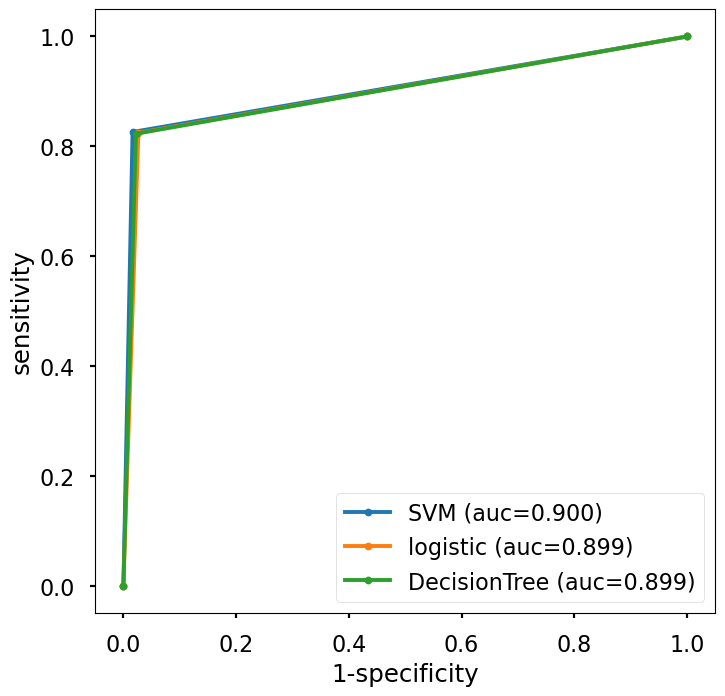

In [41]:
from sklearn.metrics import roc_auc_score
logistic_fpr, logistic_tpr, threshold= roc_curve(y_test,LR_y_predict)
auc_logistic= auc(logistic_fpr, logistic_tpr)
svm_fpr, svm_tpr, threshold= roc_curve(y_test, y_pred_svm)
auc_svm= auc(svm_fpr, svm_tpr)
DecisionTreeClassifier_fpr, DecisionTreeClassifier_tpr, threshold= roc_curve(y_test,DT_Final)
auc_svm= auc(DecisionTreeClassifier_fpr, DecisionTreeClassifier_tpr)
plt.figure(figsize=(8,8), dpi=100)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (auc=%0.3f)'% auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='logistic (auc=%0.3f)'% auc_logistic)
plt.plot(DecisionTreeClassifier_fpr, DecisionTreeClassifier_tpr, marker='.', label='DecisionTree (auc=%0.3f)'% auc_logistic)
plt.xlabel('1-specificity')
plt.ylabel('sensitivity')
plt.legend()
plt.show()

In [58]:
#convert numpy into panda
X_Panda = pd.DataFrame(X_train, columns=["X_Data"])
X_Panda= pd.DataFrame(X_train)
#check later

ValueError: Shape of passed values is (4009, 4), indices imply (4009, 1)

In [65]:
#random forest while module randon forest is called ensemble.
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=42).fit(X_train, y_train)

In [43]:
train_RF = RF.predict(X_train)
Training_Score_RF  = accuracy_score(y_train, train_RF)
print("The training accuracy_score is : {} % ".format(Training_Score_RF*100))
Scoring_RF = RF.score(X_test, y_test)
print("The Testing accuracy_score is : {} % ".format(Scoring_RF.round(4)*100))
#STILL Overfitting but testing accuracy here is higher compared with decision tree 

The training accuracy_score is : 100.0 % 
The Testing accuracy_score is : 93.92 % 


In [44]:
# Number of Trees in the RF model
len(RF.estimators_)

100

In [45]:
#title Feature Importance 
%time
feature_imp = pd.Series(RF.feature_importances_,index=X_2.columns).sort_values(ascending=False)
feature_imp.round(2)*100

Wall time: 0 ns


HDRA    48.0
HCAL    30.0
RHOZ    14.0
GR       8.0
dtype: float64

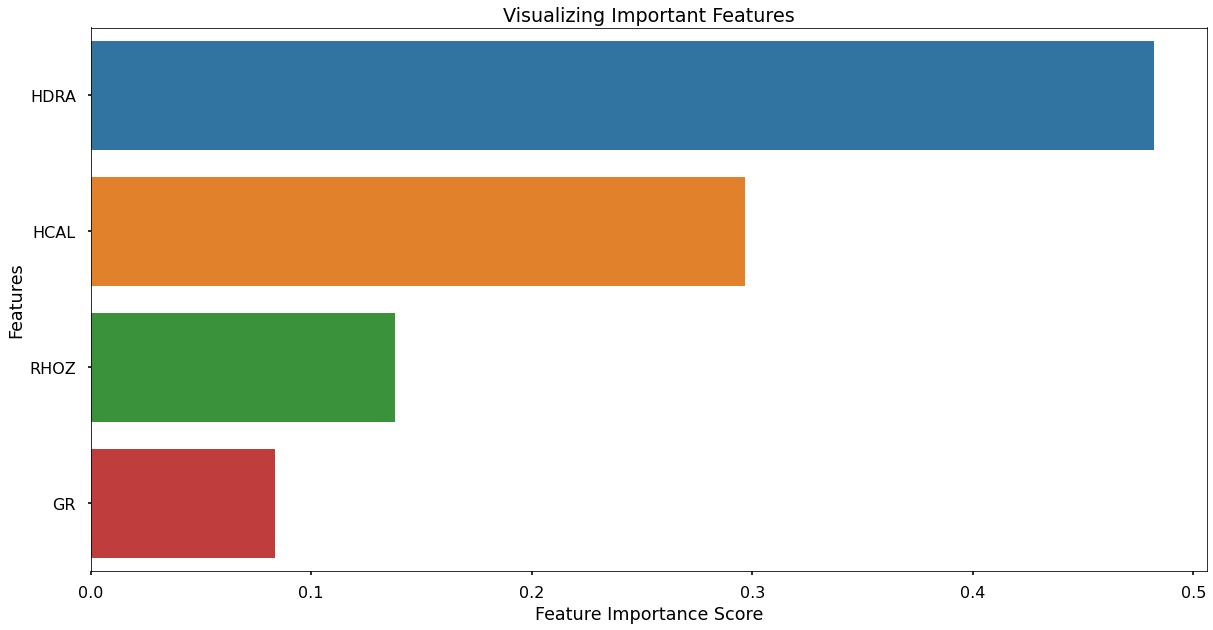

In [46]:
#@title  Feature Importance Plotting

plt.figure(figsize=(20,10))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()
#feature importance changed here more logically compared with decision tree where HDRA and HCAl ARE MOST IMPORTANT

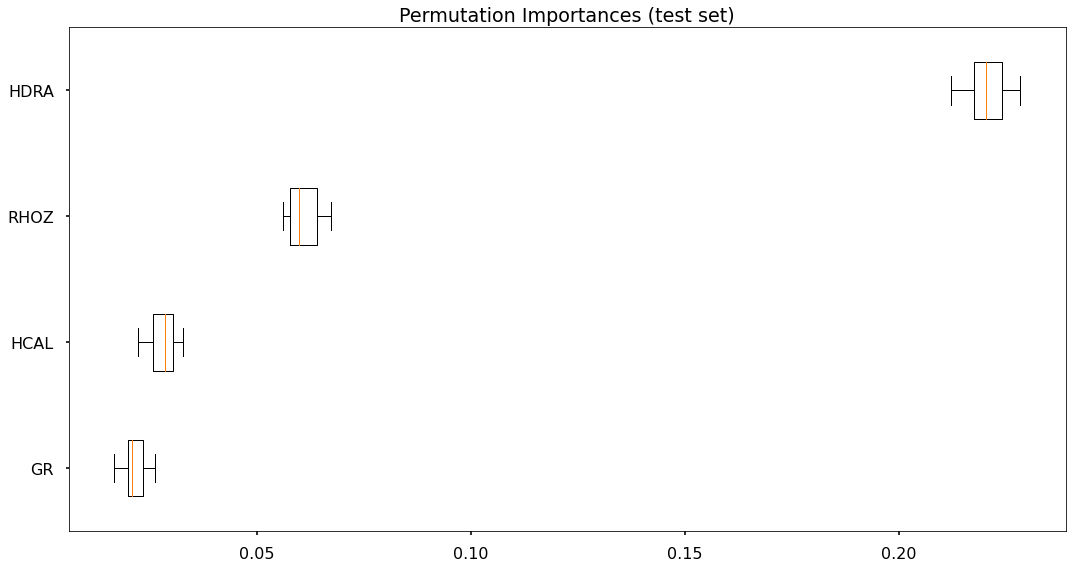

In [47]:
#take care module permutation is inside library called inspection.

from sklearn.inspection import permutation_importance

result = permutation_importance(RF, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=-1)

sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize = (15,8))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_2.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()
#here permutation is changed compared with randon forest feature importance but it gave same result like desicion tree

In [48]:
# Creat General Function to test the parameters:
# check python **Kwargs: https://www.geeksforgeeks.org/args-kwargs-python/#:~:text=The%20special%20syntax%20**kwargs,and%20any%20number%20of%20them).

def test_params(**params): 
  model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, y_train)
  return model.score(X_train, y_train), model.score(X_test, y_test)

In [74]:

#test_params(max_features = 'log2')
test_params(oob_score=True)

(1.0, 0.9392405063291139)

10 0.99 0.93
20 1.0 0.94
30 1.0 0.94
40 1.0 0.94
50 1.0 0.94
60 1.0 0.94
70 1.0 0.94
80 1.0 0.94
90 1.0 0.94
100 1.0 0.94
110 1.0 0.94
120 1.0 0.94
130 1.0 0.94
140 1.0 0.94
150 1.0 0.94
160 1.0 0.94
170 1.0 0.94
180 1.0 0.94
190 1.0 0.94
200 1.0 0.94
210 1.0 0.94
220 1.0 0.94
230 1.0 0.94
240 1.0 0.94
250 1.0 0.94
260 1.0 0.94
270 1.0 0.94
280 1.0 0.94
290 1.0 0.94


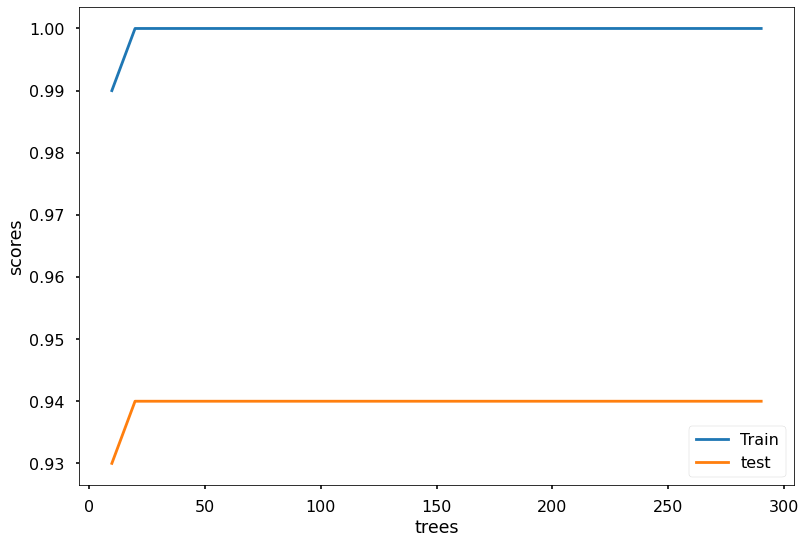

In [52]:
#title Number of trees testing

scoring_RF_Final = []
test_score_RF_Final=[]
trees_RF =[]
for i in range(10,300,10):
    Rf = RandomForestClassifier(n_estimators=i, n_jobs=-1, random_state=42).fit(X_train,y_train)
    h = Rf.score(X_train,y_train).round(2)
    z = Rf.score(X_test,y_test).round(2)
    
    print(i, h, z)
    scoring_RF_Final.append(h)
    test_score_RF_Final.append(z)
    trees_RF.append(i)
  
plt.plot(trees_RF, scoring_RF_Final, label = 'Train')
plt.plot(trees_RF, test_score_RF_Final, label = 'test')
plt.legend()
plt.xlabel("trees")
plt.ylabel("scores");
#here number of estimators doesnot have effect on data.

1 1.0 0.94
2 0.98 0.94
3 0.97 0.94
4 0.96 0.94
5 0.95 0.94
6 0.95 0.94
7 0.95 0.94
8 0.94 0.94
9 0.94 0.94
10 0.94 0.94
11 0.94 0.94
12 0.94 0.94
13 0.94 0.94
14 0.94 0.94
15 0.94 0.94
16 0.94 0.94
17 0.94 0.94
18 0.94 0.94
19 0.94 0.94
20 0.93 0.94
21 0.93 0.94
22 0.93 0.94
23 0.93 0.94
24 0.93 0.94
25 0.93 0.94
26 0.93 0.94
27 0.93 0.94
28 0.93 0.94
29 0.93 0.93


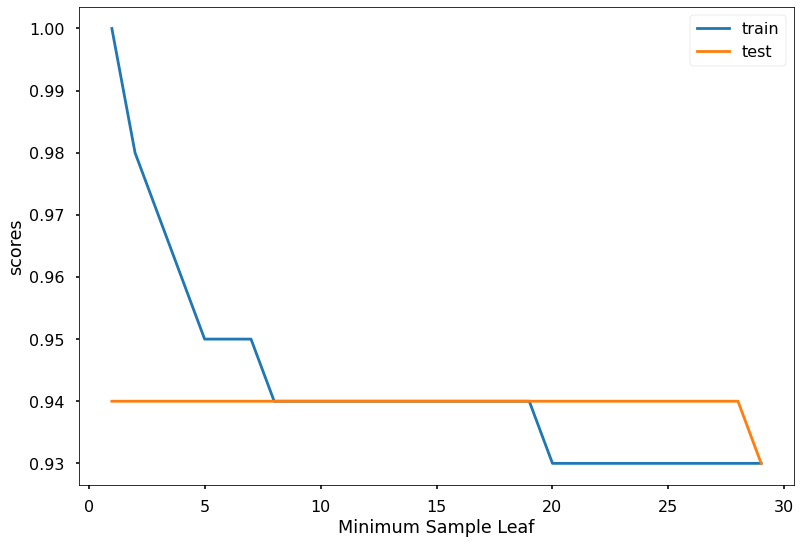

In [53]:
#@title Number of Minmum Sample Leaf testing

scoring_RF_2 = []
test_score_RF_2=[]
MSL =[]
for i in range(1,30):
    Rf = RandomForestClassifier(min_samples_leaf=i, n_jobs=-1)
    Rf.fit(X_train,y_train)
    h = Rf.score(X_train,y_train).round(2)
    z = Rf.score(X_test,y_test).round(2)
    scoring_RF_2.append(h)
    test_score_RF_2.append(z)
    MSL.append(i)
    print(i, h, z)
  
plt.plot(MSL, scoring_RF_2, label = 'train')
plt.plot(MSL, test_score_RF_2, label = 'test')
plt.legend()
plt.xlabel("Minimum Sample Leaf")
plt.ylabel("scores");
#minimum sample leaf which shoud be taken is 7.5


1 0.91 0.91
2 0.92 0.92
3 0.92 0.93
4 0.93 0.93
5 0.94 0.94
6 0.94 0.94
7 0.95 0.94
8 0.96 0.94
9 0.96 0.94
10 0.97 0.94
11 0.98 0.94
12 0.98 0.94
13 0.99 0.94
14 0.99 0.94
15 0.99 0.94
16 1.0 0.94
17 1.0 0.94
18 1.0 0.94


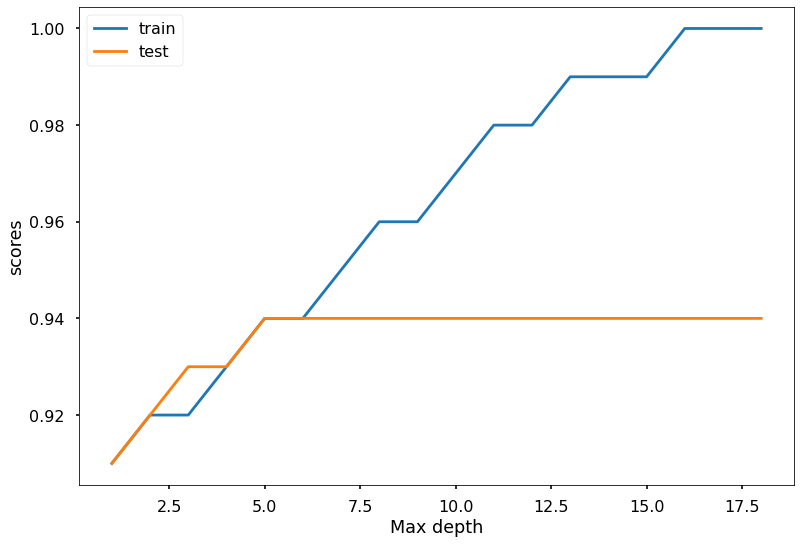

In [55]:
#@title Number of Max Depth testing

scoring = []
test_score=[]
MaxD =[]
for i in range(1,19):
    Rf = RandomForestClassifier(max_depth=i, n_jobs=-1)
    Rf.fit(X_train,y_train)
    h = Rf.score(X_train,y_train).round(2)
    z = Rf.score(X_test,y_test).round(2)

    scoring.append(h)
    test_score.append(z)
    MaxD.append(i)
    print(i, h,z)
  
plt.plot(MaxD, scoring, label = 'train')
plt.plot(MaxD, test_score, label = 'test')
plt.legend()
plt.xlabel("Max depth")
plt.ylabel("scores");
#max depth of tree is 5.5

1 1.0 0.94
2 1.0 0.94
3 1.0 0.94


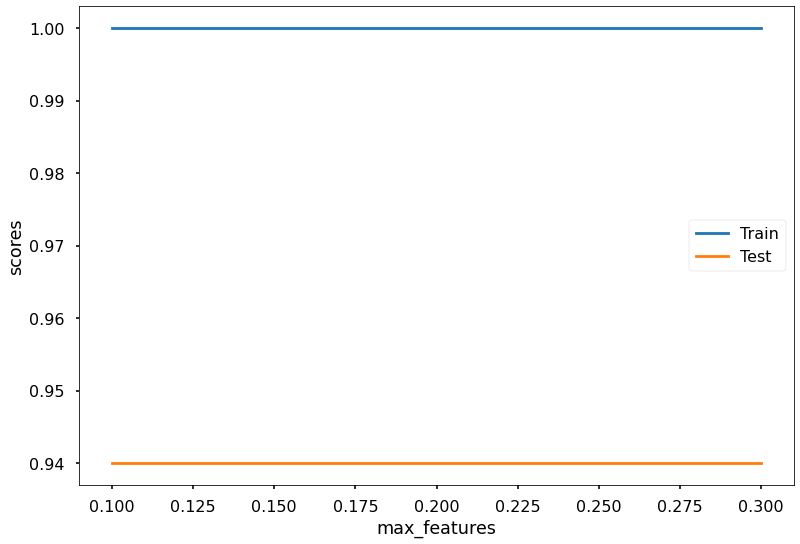

In [58]:
#title Maximum Feature testing

scoring = []
test_score=[]
MaxD =[]
for i in range(1,X_train.shape[1]):
    Rf = RandomForestClassifier(max_features=i/10, n_jobs=-1)
    Rf.fit(X_train,y_train)
    h = Rf.score(X_train,y_train).round(2)
    z = Rf.score(X_test,y_test).round(2)
    print(i, h, z)
    scoring.append(h)
    test_score.append(z)
    MaxD.append(i/10)
  
plt.plot(MaxD, scoring, label = 'Train')
plt.plot(MaxD, test_score, label = 'Test')
plt.legend()
plt.xlabel("max_features")
plt.ylabel("scores");
#maximum feature impact appear in regression more than classifaction

In [66]:
RF_Final = RandomForestClassifier(n_estimators=10,
                              min_samples_leaf=8,
                              max_features='auto',
                              max_depth = 6,
                              n_jobs=-1,
                              oob_score=True).fit(X_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


Random Forest Classifier Accuracy 93.92 %:


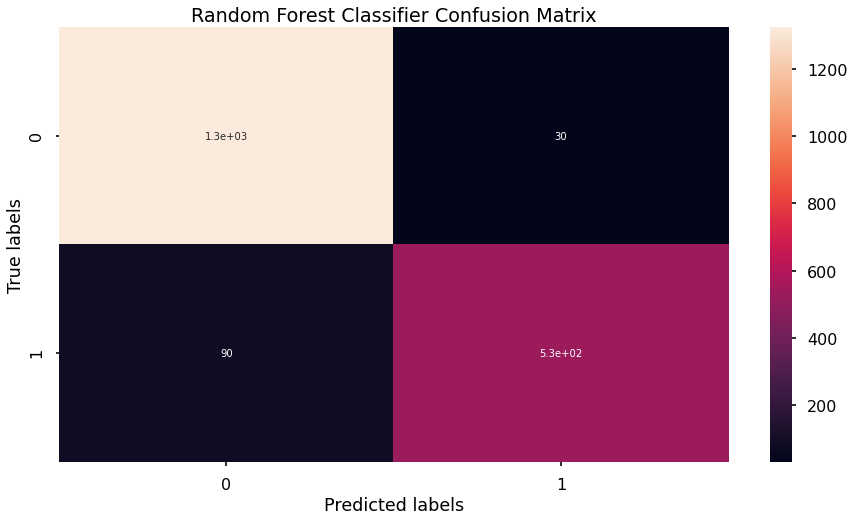

In [67]:
RF_y_predict = RF.predict(X_test)
RF_cm = confusion_matrix(y_true=y_test, y_pred=RF_y_predict)
print("Random Forest Classifier Accuracy {:.2f} %:". format(metrics.accuracy_score(y_test, RF_y_predict)*100))

# plot Confusion Matrix
plt.figure(figsize = (15,8))
ax= plt.subplot()
sns.heatmap(RF_cm, annot=True, ax = ax, cbar=True)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Random Forest Classifier Confusion Matrix')
plt.show();

In [70]:
print(classification_report(y_test, RF_y_predict))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1354
           1       0.95      0.86      0.90       621

    accuracy                           0.94      1975
   macro avg       0.94      0.92      0.93      1975
weighted avg       0.94      0.94      0.94      1975



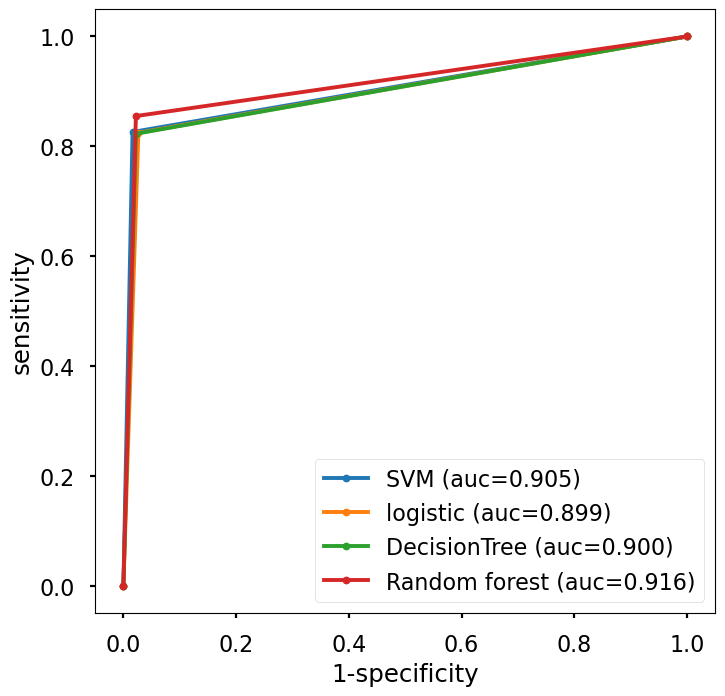

In [73]:
from sklearn.metrics import roc_auc_score
logistic_fpr, logistic_tpr, threshold= roc_curve(y_test,LR_y_predict)
auc_logistic= auc(logistic_fpr, logistic_tpr)
svm_fpr, svm_tpr, threshold= roc_curve(y_test, y_pred_svm)
auc_svm= auc(svm_fpr, svm_tpr)
DecisionTreeClassifier_fpr, DecisionTreeClassifier_tpr, threshold= roc_curve(y_test,DT_Final)
auc_DT= auc(DecisionTreeClassifier_fpr, DecisionTreeClassifier_tpr)
RandomForestClassifier_fpr, RandomForestClassifier_tpr, threshold= roc_curve(y_test,RF_y_predict)
auc_RF= auc(RandomForestClassifier_fpr, RandomForestClassifier_tpr)
plt.figure(figsize=(8,8), dpi=100)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (auc=%0.3f)'% auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='logistic (auc=%0.3f)'% auc_logistic)
plt.plot(DecisionTreeClassifier_fpr, DecisionTreeClassifier_tpr, marker='.', label='DecisionTree (auc=%0.3f)'% auc_DT)
plt.plot(RandomForestClassifier_fpr, RandomForestClassifier_tpr, marker='.', label='Random forest (auc=%0.3f)'% auc_RF)
plt.xlabel('1-specificity')
plt.ylabel('sensitivity')
plt.legend()
plt.show()